In [1]:
import numpy as np
import datetime
from datetime import date
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# %matplotlib notebook

In [2]:
sns.set_style("white")
flatui = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
#flatui = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f']
sns.set_palette(flatui)

In [3]:
df = pd.read_csv('Podatki o prometu v Ljubljani 5 oktober - 8 november 2020.csv', encoding="utf8", skiprows=1)
routes = pd.read_csv('routes 5 oktober - 8 november 2020.csv', encoding="utf8", skiprows=1)

In [4]:
df = df.rename(columns={"t_duration_in_traffic_[s]":"dt"}) 

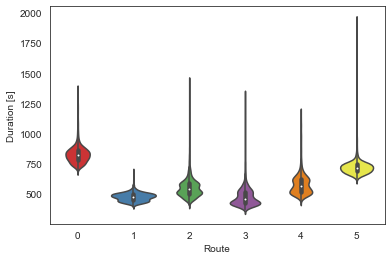

In [5]:
sns.violinplot(data=df, y='dt', x='route_id')
f = plt.gcf()
# f.set_size_inches(25, 10)
plt.xlabel("Route")
plt.ylabel("Duration [s]")
# plt.xticks
# plt.savefig("violin.pdf", bbox_inches="tight")
plt.show()

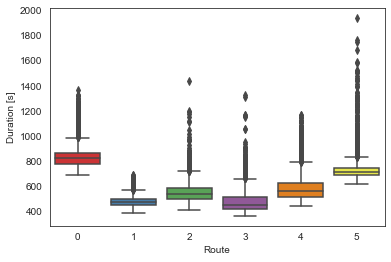

In [6]:
sns.boxplot(data=df, y='dt', x='route_id')
f = plt.gcf()
# f.set_size_inches(25, 10)
plt.xlabel("Route")
plt.ylabel("Duration [s]")
plt.xticks
# plt.savefig("box.pdf", bbox_inches="tight")
plt.show()

In [7]:
df['timestamp']=df['timestamp'].map(lambda d:datetime.datetime.strptime(d,'%Y-%m-%d %H:%M:%S.%f'))

In [8]:
#df['day'] = df['timestamp'].map(lambda d:datetime.datetime.strptime(d,'%Y-%m-%d %H:%M:%S.%f')).map(date.weekday)
df['day'] = df['timestamp'].map(date.weekday)
df['hour'] = pd.DatetimeIndex(df['timestamp']).hour
df['date'] = pd.DatetimeIndex(df['timestamp']).date
df['time'] = pd.DatetimeIndex(df['timestamp']).hour + pd.DatetimeIndex(df['timestamp']).minute/60 + pd.DatetimeIndex(df['timestamp']).second/3600
df["weekday"] = df["timestamp"].dt.weekday
df["workday"] = df["weekday"].map(lambda x: 1 if x < 5 else 0)
df["speed"] = df["t_distance_[m]"]/df["dt"]

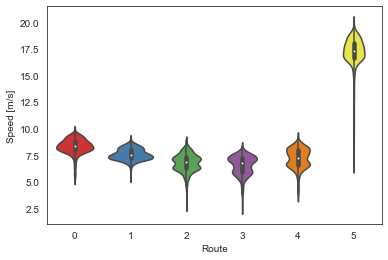

In [9]:
sns.violinplot(data=df, y='speed', x='route_id')
f = plt.gcf()
# f.set_size_inches(25, 10)
plt.xlabel("Route")
plt.ylabel("Speed [m/s]")
# plt.xticks
# plt.savefig("violin.pdf", bbox_inches="tight")
plt.show()

In [10]:
routes = df.route_id.unique()
df['t_norm'] = 0
df['t_mean'] = 0

for route in routes:
    
    df.loc[df['route_id'] == route,'t_mean'] = df.loc[df['route_id'] == route,'dt'].mean()
    df.loc[df['route_id'] == route,'t_norm'] = df.loc[df['route_id'] == route,'dt']/df.loc[df['route_id'] == route,'dt'].mean()

In [11]:
df.head()

,Unnamed: 0,timestamp,route_id,dt,t_duration_[s],t_distance_[m],w_city,w_description,w_visibility,w_clouds,...,w_sunset,day,hour,date,time,weekday,workday,speed,t_norm,t_mean
0,0,2020-10-04 23:30:00.281085,0,812.0,918.0,6894.0,Ljubljana,clear sky,10000.0,3.0,...,1.601829e+09,6,23,2020-10-04,23.500000,6,0,8.490148,0.973719,833.916135
1,1,2020-10-04 23:30:00.733197,1,496.0,517.0,3601.0,Ljubljana,clear sky,10000.0,3.0,...,1.601829e+09,6,23,2020-10-04,23.500000,6,0,7.260081,1.039832,477.000000
2,2,2020-10-04 23:30:01.132201,2,492.0,586.0,3681.0,Ljubljana,broken clouds,10000.0,75.0,...,1.601829e+09,6,23,2020-10-04,23.500278,6,0,7.481707,0.891927,551.614857
3,3,2020-10-04 23:30:01.912402,3,419.0,518.0,3068.0,Ljubljana,broken clouds,10000.0,75.0,...,1.601829e+09,6,23,2020-10-04,23.500278,6,0,7.322196,0.874340,479.218681
4,4,2020-10-04 23:30:02.727843,4,522.0,612.0,4118.0,Ljubljana,clear sky,10000.0,3.0,...,1.601829e+09,6,23,2020-10-04,23.500556,6,0,7.888889,0.893538,584.194363


<AxesSubplot:xlabel='dt', ylabel='Count'>

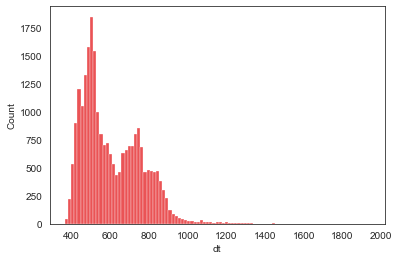

In [21]:
sns.histplot(data=df, x="dt")

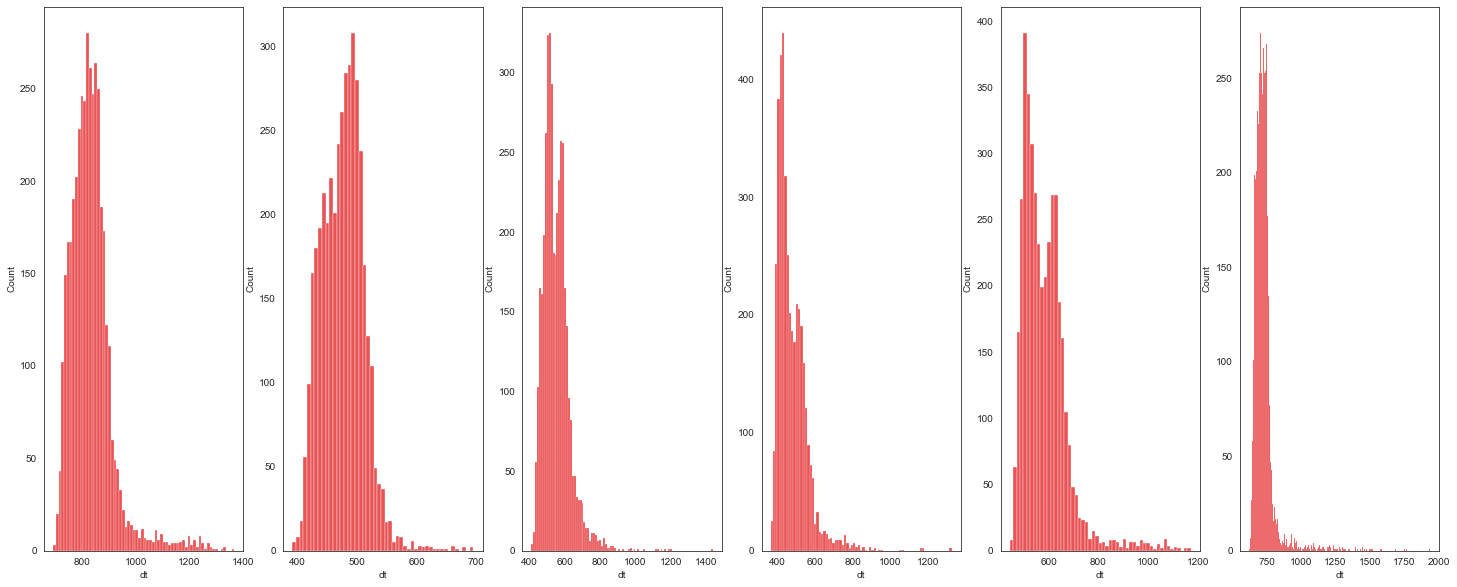

In [20]:
fig, axes = plt.subplots(1, 6)
fig.set_size_inches(25, 10)
for rid in range(6):
    sns.histplot(data=df[df['route_id'] == rid], x="dt", ax=axes[rid])

<AxesSubplot:xlabel='speed', ylabel='Count'>

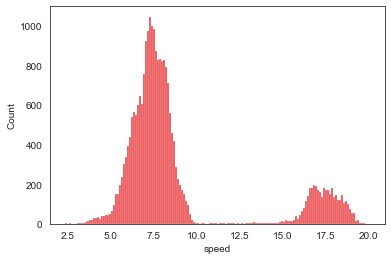

In [22]:
sns.histplot(data=df, x="speed")

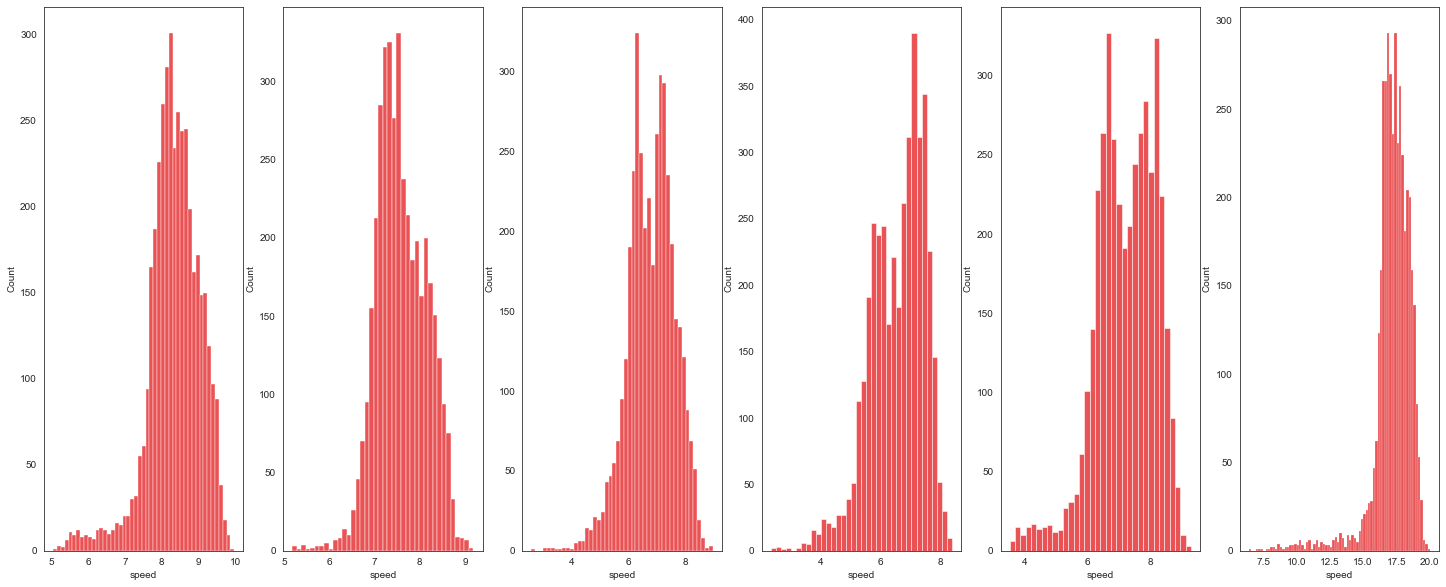

In [23]:
fig, axes = plt.subplots(1, 6)
fig.set_size_inches(25, 10)
for rid in range(6):
    sns.histplot(data=df[df['route_id'] == rid], x="speed", ax=axes[rid])

# ANOVA
https://www.pythonfordatascience.org/anova-python/
http://www.pybloggers.com/2016/03/three-ways-to-do-a-two-way-anova-with-python/


In [24]:
# Predpostavka za test ANOVA so normalne porazdelitve spremenljivk!

## Using `stats`
Podpira samo one-way

In [11]:
import scipy.stats as stats

### Compare days

In [12]:
# days = range(7)  # compare every day
# days = range(5)  # compare every workday
# days = [5, 6]  # compare every weekend day
# stats.f_oneway(*[df['dt'][df['day'] == day].dropna() for day in days])

# compare workdays vs weekend
stats.f_oneway(df['dt'][df['day'].isin(range(5))].dropna(),
               df['dt'][df['day'].isin([5, 6])].dropna())

F_onewayResult(statistic=451.5466437626384, pvalue=2.624515791693514e-99)

In [21]:
# days = range(7)  # compare every day
days = range(5)  # compare every workday
# days = [5, 6]  # compare every weekend day
stats.f_oneway(*[df['speed'][df['day'] == day].dropna() for day in days])

# compare workdays vs weekend
# stats.f_oneway(df['dt'][df['day'].isin(range(5))].dropna(),
#                df['dt'][df['day'].isin([5, 6])].dropna())

F_onewayResult(statistic=0.2855913709809213, pvalue=0.8874894197030713)

#### Separate routes

In [13]:
# days = range(7)  # compare every day
days = range(5)  # compare every workday
# days = [5, 6]  # compare every weekend day
stats.f_oneway(*[df['dt'][(df['day'] == day) & (df['route_id'] == 5)].dropna() for day in days])

# compare workdays vs weekend
# stats.f_oneway(df['dt'][(df['day'].isin(range(5))) & (df['route_id'] == 1)].dropna(),
#                df['dt'][(df['day'].isin([5, 6])) & (df['route_id'] == 1)].dropna())

F_onewayResult(statistic=1.0833857231287694, pvalue=0.3629387097046708)

In [30]:
# days = range(7)  # compare every day
# days = range(5)  # compare every workday
# days = [5, 6]  # compare every weekend day
# stats.f_oneway(*[df['speed'][(df['day'] == day) & (df['route_id'] == 5)].dropna() for day in days])

# compare workdays vs weekend
stats.f_oneway(df['dt'][(df['day'].isin(range(5))) & (df['route_id'] == 5)].dropna(),
               df['dt'][(df['day'].isin([5, 6])) & (df['route_id'] == 5)].dropna())

F_onewayResult(statistic=234.91279850828337, pvalue=1.35290282149293e-51)

### Compare routes

In [31]:
# routes = range(6)
routes = [2, 4]
stats.f_oneway(*[df['dt'][df['route_id'] == rid].dropna() for rid in routes])

F_onewayResult(statistic=289.7958544595733, pvalue=6.928705859273608e-64)

In [33]:
# routes = range(6)
routes = [0, 5]
stats.f_oneway(*[df['speed'][df['route_id'] == rid].dropna() for rid in routes])

F_onewayResult(statistic=120901.35768910468, pvalue=0.0)

## Using `statmodels`

Optional: Convert categorical variables to strings. 

Opomba: če pustiš podatke v tipu `int` so rezultati drastično drugačni. Alternativa je, da pri klicu funkcije `ols` specificiraš, da je spremenljivka kategorična!



In [113]:
#df['route_id'] = df['route_id'].astype(str)
#df['day'] = df['day'].astype(str)

In [120]:
#df['route_id'] = df['route_id'].astype(int)
#df['day'] = df['day'].astype(int)

### 2-way

In [34]:
traffic_model = ols('dt ~ C(route_id)*C(day)', data=df).fit()
#traffic_model = ols('dt ~ route_id*day', data=df).fit()
sm.stats.anova_lm(traffic_model, typ=2)  # Type 2 ANOVA DataFrame

,sum_sq,df,F,PR(>F)
C(route_id),4.227694e+08,5.0,14406.738915,0.000000e+00
C(day),1.061843e+07,6.0,301.537386,0.000000e+00
C(route_id):C(day),1.790965e+06,30.0,10.171804,5.561329e-47
Residual,1.434044e+08,24434.0,NaN,NaN


In [35]:
traffic_model = ols('speed ~ C(route_id)*C(day)', data=df).fit()
sm.stats.anova_lm(traffic_model, typ=2)  # Type 2 ANOVA DataFrame

,sum_sq,df,F,PR(>F)
C(route_id),343077.794883,5.0,85045.407243,0.000000e+00
C(day),1858.413170,6.0,383.901036,0.000000e+00
C(route_id):C(day),382.587709,30.0,15.806584,1.727983e-80
Residual,19713.616789,24434.0,NaN,NaN


In [118]:
#traffic_model = ols('dt ~ C(route_id)+C(day)', data=df).fit()
#table = sm.stats.anova_lm(traffic_model, typ=2) # Type 2 ANOVA DataFrame
#table

### 3-way

In [153]:
traffic_model = ols('dt ~ C(route_id)*C(hour)*C(day)', data=df).fit()
sm.stats.anova_lm(traffic_model, typ=3)  # Type 2 ANOVA DataFrame

,sum_sq,df,F,PR(>F)
Intercept,1.424963e+07,1.0,6136.050336,0.000000e+00
C(route_id),2.315592e+06,5.0,199.424009,7.061676e-209
C(hour),2.713834e+06,23.0,50.809020,1.314218e-226
C(day),7.318033e+03,6.0,0.525205,7.896336e-01
C(route_id):C(hour),2.449145e+06,115.0,9.170692,1.216984e-147
C(route_id):C(day),6.760665e+04,30.0,0.970406,5.117452e-01
C(hour):C(day),2.739545e+06,138.0,8.548397,5.932106e-160
C(route_id):C(hour):C(day),5.674340e+06,690.0,3.541210,7.085408e-181
Residual,5.449927e+07,23468.0,NaN,NaN


In [36]:
traffic_model = ols('speed ~ C(route_id)*C(hour)*C(day)', data=df).fit()
sm.stats.anova_lm(traffic_model, typ=3)  # Type 2 ANOVA DataFrame

,sum_sq,df,F,PR(>F)
Intercept,1925.218425,1.0,7615.362149,0.000000e+00
C(route_id),2287.347237,5.0,1809.558578,0.000000e+00
C(hour),192.343905,23.0,33.079668,1.972391e-143
C(day),0.998787,6.0,0.658464,6.833359e-01
C(route_id):C(hour),277.005382,115.0,9.527982,2.810181e-155
C(route_id):C(day),23.857358,30.0,3.145659,1.475833e-08
C(hour):C(day),218.667241,138.0,6.267801,3.151763e-103
C(route_id):C(hour):C(day),891.802276,690.0,5.112461,0.000000e+00
Residual,5932.879502,23468.0,NaN,NaN


# Circadian analysis

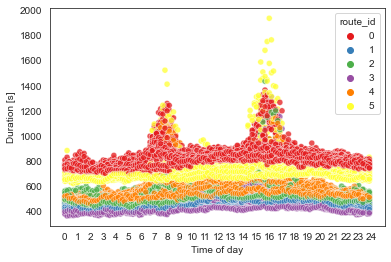

In [37]:
#sns.scatterplot(data=df.iloc[:1000,:], y='dt', x='time', hue='route_id', alpha=0.75)
#sns.lineplot(data=df.iloc[:1000,:], y='dt', x='time', hue='route_id', alpha=0.75)

sns.scatterplot(data=df, y='dt', x='time', hue='route_id',
                alpha=0.75, palette=flatui)
#sns.lineplot(data=df, y='dt', x='time', hue='route_id', alpha=0.75)


f = plt.gcf()
# f.set_size_inches(25, 10)
plt.xlabel("Time of day")
plt.ylabel("Duration [s]")

plt.xticks(np.arange(25), np.arange(25))
plt.savefig("time.pdf", bbox_inches="tight")
# plt.legend(routes.astype(str))
plt.show()

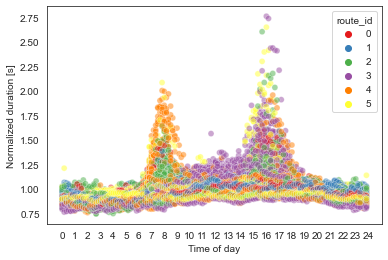

In [38]:
#sns.scatterplot(data=df.iloc[:1000,:], y='dt', x='time', hue='route_id', alpha=0.75)
#sns.lineplot(data=df.iloc[:1000,:], y='dt', x='time', hue='route_id', alpha=0.75)

sns.scatterplot(data=df, y='t_norm', x='time',
                hue='route_id', alpha=0.5, palette=flatui)
#sns.lineplot(data=df, y='dt', x='time', hue='route_id', alpha=0.75)


f = plt.gcf()
# f.set_size_inches(25, 10)
plt.xlabel("Time of day")
plt.ylabel("Normalized duration [s]")

plt.xticks(np.arange(25), np.arange(25))
plt.savefig("time_normalized.pdf", bbox_inches="tight")
# plt.legend(routes.astype(str))
plt.show()

In [39]:
df_cos = pd.DataFrame()
df_cos['test'] = df['route_id'].astype(str)
df_cos['x'] = df['time']
df_cos['y'] = df['dt']

In [41]:
from CosinorPy import cosinor

In [42]:
df_results = cosinor.fit_group(df_cos, n_components = [1,2,3,4], period=24, plot=False)
df_best_models = cosinor.get_best_models(df_cos, df_results, n_components = [1,2,3,4])
cosinor.plot_df_models(df_cos, df_best_models, folder="cosinor_results")

UnboundLocalError: local variable 'best_row' referenced before assignment

,test,period,n_components,p,q,p_reject,q_reject,RSS,R2,R2_adj,log-likelihood,period(est),amplitude,acrophase,mesor,ME,resid_SE
0,0,24,4,1.110223e-16,1.110223e-16,1.110223e-16,2.960595e-16,7.602782e+05,0.687690,0.679389,-1649.625395,24,130.829347,-4.114365,892.838981,98.901043,50.257748
1,1,24,2,1.110223e-16,1.110223e-16,5.404594e-01,5.890298e-01,9.407434e+04,0.626383,0.621483,-1325.737533,24,35.140503,-3.013707,487.925644,34.558949,17.562473
2,2,24,4,1.110223e-16,1.110223e-16,2.338260e-04,3.507390e-04,2.921339e+05,0.791368,0.785823,-1501.372191,24,88.714938,-4.009540,584.070616,61.306363,31.153562
3,3,24,4,1.110223e-16,1.110223e-16,3.651930e-01,4.173635e-01,3.258273e+05,0.796347,0.790934,-1518.291251,24,102.401513,-4.114365,531.488760,64.745309,32.901103
4,4,24,4,1.110223e-16,1.110223e-16,1.110223e-16,2.960595e-16,5.714486e+05,0.760514,0.754149,-1605.371372,24,133.832514,-2.175110,598.503524,85.743894,43.571785
5,5,24,4,1.110223e-16,1.110223e-16,6.121864e-02,7.346237e-02,3.582609e+06,0.486522,0.472875,-1889.900522,24,173.450600,-3.983334,824.790695,214.691226,109.097915
